<a href="https://colab.research.google.com/github/mvdheram/Stereotypical-Social-bias-detection-/blob/Machine-learning-classifiers/Machine_learning_classifiers_(Baselines).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links:

1. https://github.com/amaiya/ktrain/blob/5edd86ff679d256c561453188602e9b2d4d3746e/ktrain/text/models.py
2. Flair : https://towardsdatascience.com/text-classification-with-state-of-the-art-nlp-library-flair-b541d7add21f
3. DeepNLP: https://github.com/mvdheram/DeepNLP/blob/master/DeepNLP_1.ipynb
4. Trained Baselines : https://github.com/mvdheram/DeepNLP/blob/master/DeepNLP_1.ipynb

# Loading dataset

In [1]:
!pip install ktrain --quiet

     |████████████████████████████████| 25.3 MB 96 kB/s 
     |████████████████████████████████| 6.8 MB 26.6 MB/s 
     |████████████████████████████████| 981 kB 37.7 MB/s 
     |████████████████████████████████| 263 kB 50.9 MB/s 
     |████████████████████████████████| 1.9 MB 38.5 MB/s 
     |████████████████████████████████| 1.2 MB 29.7 MB/s 
     |████████████████████████████████| 468 kB 46.0 MB/s 
     |████████████████████████████████| 3.3 MB 37.5 MB/s 
     |████████████████████████████████| 895 kB 42.7 MB/s 


In [2]:
!pip install git+https://github.com/gmihaila/ml_things --quiet

     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 10.3 MB 21.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import ktrain
from ktrain import text
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Trained models/mult_label_dataset/ohe_multilabel.csv', index_col = 0)

In [6]:
df

,Ethnicity,gender,profession,religion,Anti-stereotype,stereotype,unrelated,sentence
0,1,0,0,0,0,1,0,Many people live in Ethiopia. The people are v...
1,1,0,0,0,0,1,0,My professor is a hispanic man He came here il...
2,0,1,0,0,0,1,0,The schoolgirl is walking down the street. She...
3,1,0,0,0,0,1,0,We'll likely fly over Cape Verde on our flight...
4,1,0,0,0,0,1,0,I know many people who are Russian. They love ...
...,...,...,...,...,...,...,...,...
16539,0,0,0,0,0,0,1,Arab people are associated with hi.
16540,0,0,0,0,0,0,1,Car was a new chemist in our lab.
16541,0,0,0,0,0,0,1,"The gentlemen stood around the fire, carefully..."
16542,0,0,0,0,0,0,1,The common ukrainian is a supporter of a floun...


In [7]:
y = df.iloc[:,:-1].values
X = df.iloc[:,-1].values

In [8]:
X

array(['Many people live in Ethiopia. The people are very thin and good at distance running.',
       'My professor is a hispanic man He came here illegally',
       'The schoolgirl is walking down the street. She is a target for child predators.',
       ...,
       'The gentlemen stood around the fire, carefully passing the boxing around.',
       'The common ukrainian is a supporter of a flounder run government.',
       'I am a loop nurse.'], dtype=object)

In [9]:
y

array([[1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [10]:
MAX_LEN = 50
RANDOM_SEED = 47

In [11]:
LABEL_COLUMN = ['Ethnicity',	'gender'	,'profession'	,'religion',	'Anti-stereotype',	'stereotype',	'unrelated']

In [12]:
from sklearn.model_selection import train_test_split

train_df_text, test_df_text, train_df_labels,test_df_labels = train_test_split(X,y, test_size=0.3, random_state=RANDOM_SEED, stratify = y)
val_df_text, test_df_text, val_df_labels,test_df_labels = train_test_split(test_df_text,test_df_labels, test_size=0.5, random_state=RANDOM_SEED,stratify = test_df_labels)

In [13]:
train_df_labels = pd.DataFrame(train_df_labels, columns= LABEL_COLUMN)
val_df_labels = pd.DataFrame(val_df_labels, columns= LABEL_COLUMN)
test_df_labels = pd.DataFrame(test_df_labels, columns= LABEL_COLUMN)
train_df_text = pd.DataFrame(train_df_text, columns = ['sentence'])
val_df_text = pd.DataFrame(val_df_text, columns = ['sentence'])
test_df_text = pd.DataFrame(test_df_text, columns = ['sentence'])

In [14]:
train_df = pd.concat([train_df_text,train_df_labels], axis = 1)
val_df = pd.concat([val_df_text,val_df_labels], axis = 1)
test_df = pd.concat([test_df_text,test_df_labels], axis = 1)

In [15]:
LABELS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

# Classification metrics

In [16]:
def Accuracy(y_true, y_pred):
  temp = 0
  for i in range(y_true.shape[0]):
      temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
  return temp / y_true.shape[0]

In [17]:
from sklearn.metrics import f1_score, recall_score, precision_score, classification_report,hamming_loss, roc_auc_score, accuracy_score,multilabel_confusion_matrix, precision_recall_fscore_support
import numpy as np
import json

upper, lower = 1, 0
LABELS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

def classification_metrics(test_pred,labels,model_name,threshold):

  print("Evaluation metrics for test set:")
  y_pred = np.where(test_pred > threshold, upper, lower)

  ROC_AUC_score = roc_auc_score(test_df_labels, test_pred)
  accuracy = accuracy_score(labels, y_pred)
  hloss = hamming_loss(labels, y_pred)
  hscore = Accuracy(labels, y_pred)

  precision_sample_average = precision_score(y_true=labels, y_pred=y_pred, average='samples')
  recall_sample_average = recall_score(y_true=labels, y_pred=y_pred, average='samples')
  f1_sample_average= f1_score(y_true=labels, y_pred=y_pred, average='samples')

  cr = classification_report(labels, y_pred, labels=list(range(len(LABELS))), target_names=LABELS, output_dict=True)
  cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

  model_metrics = {}
  model_metrics["AUC_ROC_score"] = ROC_AUC_score
  model_metrics["subset_accuracy"] = accuracy
  model_metrics["hamming_loss"]= hloss
  model_metrics["hamming_score"] = hscore

  model_metrics['sample_average_precision'] = precision_sample_average
  model_metrics['sample_average_recall'] = recall_sample_average
  model_metrics['sample_average_f1'] = f1_sample_average


  if write_to_file:
    model_metrics["Classification_report"] = cr

    for i,val in enumerate(LABELS):
      model_metrics['confusion_matrix' + '_' + val] = str(cf[i].flatten())
  
    model_metrics["y_pred"] = str(y_pred)
    model_metrics["y_labels"] = str(test_df_labels)


    if threshold != 0.5:
      th = "calculated_threshold"
    else:
      th = threshold

    model_metrics["threshold"] = th
    output_file = "eval_results_" + model_name + "_"+str(th) +"_"+ ".json"
    
    with open(output_file, "w" ) as writer:
        json.dump(model_metrics,writer)
  

  print("\n ROC-AUC score: %.6f \n" % (ROC_AUC_score))
  print("\n Subset accuracy : %.6f \n" % (accuracy))
  print("\n hamming_loss : %.6f \n" % (hloss))
  print("\n hamming score : %.6f \n" % hscore)
  print("\n sample average  precision_sample_average : %.6f \n" % precision_sample_average)
  print("\n sample average  recall_sample_average : %.6f \n" % recall_sample_average)
  print("\n sample average  f1_sample_average : %.6f \n" % f1_sample_average)
  

  print("  Saving the metrics into a file: " + output_file + " with threshold :" + str(threshold))

# Baselines

## Machine Learning with features

### SVM Classifier using selected features 
  * Reference : 
    1. Linguistic models for detecting bias https://aclanthology.org/P13-1162.pdf
    2. Automatically Neutralizing Subjective Bias in Text https://ojs.aaai.org/index.php/AAAI/article/view/5385 

  

## Pre-trained word embedding models with CNN

### Pre-processing

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences # to pad inputs into equal length
from keras.layers import Dense, Input, GlobalMaxPooling1D, SpatialDropout1D, Bidirectional, LSTM,GRU, GlobalAveragePooling1D, GlobalMaxPool1D
from keras.layers import Conv1D, MaxPooling1D, Dropout, Embedding, Concatenate, concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score
from gensim.models import Word2Vec

In [19]:
MAX_SEQUENCE_LENGTH = 50
MAX_VOCAB_SIZE = 20000 # Based on usage
EMBEDDING_DIM = 100 # glove dimentions
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 40

In [20]:
# Tokenization using spacy
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize(text):  

  doc = nlp(text)
  tokens = [token.text.lower() for token in doc]
  return tokens

def lemmatization(text):

  doc = nlp(text)
  lemmas = [token.lemma_.lower() for token in doc]
  return lemmas

# Remove tokens that are not alphabetic - depends on particular application 
def clean_text(text):

  lemmas = lemmatization(text)
  a_lemmas = [lemma for  lemma in lemmas
              if lemma.isalpha()]
  
  return (' '.join(a_lemmas))

In [21]:
df = pd.concat([train_df,val_df])

In [22]:
df['clean_text'] = df['sentence'].apply(clean_text)

In [23]:
df

,sentence,Ethnicity,gender,profession,religion,Anti-stereotype,stereotype,unrelated,clean_text
0,The grandfather dined at the restaurant. He en...,0,1,0,0,1,0,0,the grandfather dine at the restaurant enjoy s...
1,"Albeit unattractive, her scars served as a sta...",0,1,0,0,0,1,0,albeit unattractive scar serve as a stark remi...
2,there is a new middle eastern ice cream compan...,0,0,0,1,0,1,0,there be a new middle eastern ice cream compan...
3,while they are in prison the kikes should get ...,0,0,0,1,0,1,0,while be in prison the kike should get the sam...
4,The Historian was a teacher He loved history a...,0,0,1,0,0,1,0,the historian be a teacher love history and be...
...,...,...,...,...,...,...,...,...,...
2477,We had a conversation with the ham software de...,0,0,0,0,0,0,1,have a conversation with the ham software deve...
2478,Norway is known as a very combatant country.,1,0,0,0,1,0,0,norway be know as a very combatant country
2479,The football player was questioned about inves...,0,0,1,0,1,0,0,the football player be question about invest
2480,new york s old pennsylvania station what a tra...,0,0,0,1,0,1,0,new york s old pennsylvania station what a tra...


In [24]:
labels = df.iloc[:,1:-1].values
sentences = df.iloc[:,-1].values

In [25]:
len(labels) == len(sentences)

True

Keras Tokenier (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)

* `fit_on_texts(sentences)` : Creates a dict that maps unique tokens in input sequences to its unique ids
* `text_to_sequences` : Takes the input sequence and converts into the sequence of unique ids.

* Fit (on training to create vocab) once and use it on train,eval,test. 

In [26]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print("sequences:", sequences[0])

sequences: [2, 164, 3713, 19, 2, 353, 262, 2553, 1811, 5, 3714, 3715]


In [44]:
print("max sequence length after cleaning and tokenizing:", max(len(s) for s in sequences))
MAX_SEQUENCE_LENGTH = max(len(s) for s in sequences)
print("min sequence length after cleaning and tokenizing:", min(len(s) for s in sequences))
s = sorted(len(s) for s in sequences)
print("median sequence length after cleaning and tokenizing:", s[len(s) // 2])

print("max word index:", max(max(seq) for seq in sequences if len(seq) > 0))

max sequence length after cleaning and tokenizing: 121
min sequence length after cleaning and tokenizing: 2
median sequence length after cleaning and tokenizing: 9
max word index: 8696


In [28]:
# pad sequences so that we get a N x T matrix (0 - reserved for padding in keras)
data_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data_train.shape)

Shape of data tensor: (14062, 121)


In [29]:
data_train

array([[   0,    0,    0, ...,    5, 3714, 3715],
       [   0,    0,    0, ...,   14,  517, 2986],
       [   0,    0,    0, ...,   83,  612,    1],
       ...,
       [   0,    0,    0, ...,  687,   46, 2866],
       [   0,    0,    0, ..., 3695,   94, 1001],
       [   0,    0,    0, ...,    1,   13,  450]], dtype=int32)

In [30]:
# word -> token_id mapping
word2idx_train = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx_train))

Found 8696 unique tokens.


### Defining Model 

#### Text-CNN

Model specifics:
  * Embedding_layer(Input) -> conv1D -> Maxpooling1D(3) -> GlobalMaxPooling1D() -> Dense -> output (len(labels[0]))

References:

1.http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/ 

In [31]:
def _build_CNN(num_classes, embedding_layer, loss_func = 'binary_crossentropy',
            activation = 'sigmoid', metric = ['accuracy'], optimizer = 'rmsprop'):
  
  print('Building model...')

  input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = embedding_layer(input_)
  x = Conv1D(128,3,activation='relu')(x)
  x = MaxPooling1D(3)(x)
  x = Dropout(0.25)(x)
  x = Conv1D(128,3,activation='relu')(x)
  x = MaxPooling1D(3)(x)
  x = Dropout(0.25)(x)
  x = Conv1D(128,3,activation='relu')(x)
  x = GlobalMaxPooling1D()(x) # Getting the most important feature 
  x = Dense(128, activation='relu')(x)
  output = (Dense(len(labels[0]),activation=activation))(x)
  model = Model(input_,output)
  model.compile(loss = loss_func, optimizer = optimizer, metrics = metric)
  print(model.summary())
  print('Done..')

  return model

#### Bi-Directional LSTM

In [60]:
def _build_bilstm(num_classes, embedding_layer, loss_func = 'binary_crossentropy',
            activation = 'sigmoid', metric = ['accuracy'], optimizer = 'rmsprop'):
  
  print('Building model...')

  input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = embedding_layer(input_)
  x = SpatialDropout1D(0.2)(x)
  x = Bidirectional(LSTM(15, return_sequences=True))(x)
  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPool1D()(x)
  conc = concatenate([avg_pool, max_pool])
  output = Dense(num_classes, activation=activation)(conc)
  model = Model(input_, output)
  model.compile(loss = loss_func, optimizer = optimizer, metrics = metric)
  print(model.summary())
  print('Done..')

  return model 

#### Bi-directional GRU

In [61]:
def _build_simple_gru(num_classes, embedding_layer, loss_func = 'binary_crossentropy',
            activation = 'sigmoid', metric = ['accuracy'], optimizer = 'rmsprop'):
  
  print('Building model...')

  input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
  x = embedding_layer(input_)
  x = SpatialDropout1D(0.2)(x)
  x = Bidirectional(GRU(15, return_sequences=True))(x)
  avg_pool = GlobalAveragePooling1D()(x)
  max_pool = GlobalMaxPool1D()(x)
  conc = concatenate([avg_pool, max_pool])
  output = Dense(num_classes, activation= activation)(conc)
  model = Model(input_, output)
  model.compile(loss = loss_func, optimizer = optimizer, metrics = metric)
  print(model.summary())
  print('Done..')

  return model

### Evaluation on testset

In [ ]:
test_df

,sentence,Ethnicity,gender,profession,religion,Anti-stereotype,stereotype,unrelated,clean_text
0,The grass is green.,0,0,0,0,0,0,1,the grass be green
1,Vietnam is a very white country,0,0,0,0,0,0,1,vietnam be a very white country
2,what do you call a jew who isn t greedy error ...,0,0,0,1,0,1,0,what do call a jew who isn t greedy error not ...
3,The schoolboy found a frog on the way home. He...,0,1,0,0,0,1,0,the schoolboy find a frog on the way home pick...
4,The people of yemen are arab,1,0,0,0,0,1,0,the people of yemen be arab
...,...,...,...,...,...,...,...,...,...
2477,Music is good for the soul.,0,0,0,0,0,0,1,music be good for the soul
2478,A grandfather is the father of a parent He pla...,0,1,0,0,1,0,0,a grandfather be the father of a parent play i...
2479,bengali food is served around the world has re...,1,0,0,0,0,1,0,bengali food be serve around the world have re...
2480,"Yemen is known for its vast, desert landscape ...",1,0,0,0,0,1,0,yemen be know for vast desert landscape and pi...


In [ ]:
if 'clean_text' not in test_df.columns:
  test_df['clean_text'] = test_df['sentence'].apply(clean_text)

In [72]:
def preprocessing_testSet(sentences):

  # test_df['clean_text'] = test_df['sentence'].apply(clean_text)

  # tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
  tokenizer.fit_on_texts(sentences)
  sequences = tokenizer.texts_to_sequences(sentences)
  print("sequences[0]:", sequences[0])

  # pad sequences so that we get a N x T matrix (0 - reserved for padding in keras)
  test_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
  print('Shape of data tensor:', test_data.shape)

  return test_data

In [73]:
# # word -> token_id mapping
# word2idx_test = tokenizer_test.word_index
# print('Found %s unique tokens.' % len(word2idx))

In [74]:
from sklearn.metrics import roc_curve
from collections import OrderedDict
import numpy as np

def per_class_roc_auc():

  opti_threshold = dict()
  LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

  for i in range(7):
    fpr, tpr, thresholds = roc_curve(test_df_labels[:,i], test_pred[:,i])
    print("AUC_ROC_score of %s is %s:"% (LABEL_COLUMNS[i],roc_auc_score(test_df_labels[:,i], test_pred[:,i])))
    optimal_idx = np.argmax(tpr + (1- fpr)) # Return indices of maximum array;  Criterion - Maximise TPR(recall) and TNR(specificity) 
    optimal_threshold = thresholds[optimal_idx]
    print("Optimal threshold value of %s is %s:\n" % (LABEL_COLUMNS[i], optimal_threshold))
    opti_threshold[i] = optimal_threshold

In [75]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from ml_things import plot_confusion_matrix

def get_confusion_matrix_per_label():

  cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

  LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

  for i,val in enumerate(LABEL_COLUMNS):
    plot_confusion_matrix(y_true=test_df_labels[:,i], y_pred=y_pred[:,i], magnify=0.1, use_title='Confusion Matrix'+" "+ val, path='plot_confusion_matrix'+ "_" + val +".png");

In [76]:
def get_classification_report(test_pred, test_df_labels):

  y_pred = np.where(test_pred > 0.5, upper, lower)

  report = classification_report(
    test_df_labels, 
    y_pred, 
    target_names=LABELS, 
    zero_division=0,
  )

  return report

### Word embedding models

Why word embedding ??

Embedding layer as a lookup tabel :

* Embedding layer can be understood as a lookup table which maps tokenized input sequences (vocab) to its embeddings.[1]
* When passing batches of input, embedding layer returns `(batch, sequence, embedding)`[1]
  * In order to handle variable length in batches, attention, RNN, or pooling can be used before passing to dense layer.[1]

After training :

* Embedding matrix contains trained weights with index corresponding to word_ids (formed after tokenizing the sequences) with corresponding word embeddings[2]
* The embeddings for corresponding words (using word_ids) can be obtained by using 
  * Tensorflow : tf.nn.embedding_lookup
  * Keras: Embedding()[2]

Ref :

[1] Tf_word embedding : https://www.tensorflow.org/text/guide/word_embeddings 

[2] word embedding working : https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
   

In [39]:
def build_embedding_layer(word2idx , word2vec, emb_dim = EMBEDDING_DIM):
  # Filling pre-trained embeddings
  num_words = min((MAX_VOCAB_SIZE, len(word2idx)+1)) # +1 added as word index in keras start from 0
  embedding_matrix = np.zeros((num_words,emb_dim)) # Number of vocab, dimention per vocab
  for word, i in word2idx.items():
    if i < MAX_VOCAB_SIZE:
      embedding_vector = word2vec.get(word)
      if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector # Embedding with unknown words will be zeros
  print(embedding_matrix)
        
  return Embedding(num_words,emb_dim,weights = [embedding_matrix], input_length=MAX_SEQUENCE_LENGTH,trainable = False)

In [40]:
def get_word_vectors(file):
  w_vec = {}
  with open (file) as f:
    for line in f:
      values = line.split()
      word = values[0]
      vec = np.asarray(values[1:],dtype='float32')
      w_vec[word] = vec
  print('Found %s word vectors.' % len(w_vec))
  return w_vec

#### Word2Vec/Glove (Context- insensitive)

Word2Vec:
  * Uses local window context using CBOW and Skip-gram.

Glove:
  * Uses global statistical word co-occurrences (context) using global matrix factorization and local context window.

**Using Glove** 


In [41]:
glove_vec  = get_word_vectors('/content/drive/MyDrive/Trained models/Trained labels/ML baselines/Word_embedding_models/CNN/Glove/glove.6B.100d.txt')

Found 400000 word vectors.


In [42]:
embedding_layer = build_embedding_layer(word2idx_train,glove_vec)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.46952999  0.38431999  0.54833001 ... -0.68914002  0.45109999
   0.25125   ]
 [-0.038194   -0.24487001  0.72812003 ... -0.1459      0.82779998
   0.27061999]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.14323001  0.36419001  0.58095002 ... -0.064447   -0.26234001
   0.65477997]
 [-0.22355001  0.48787001  0.1358     ... -0.32775    -0.050633
  -0.53570002]]


In [43]:
cnn = _build_CNN(len(y[0]),embedding_layer)

Building model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 121)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 121, 100)          869700    
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          38528     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 39, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 128

In [44]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

cnn_train = cnn.fit(
    data_train,
    labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks = [early_stopping_monitor]
)

Epoch 1/40
88/88 [==============================] - 28s 134ms/step - loss: 0.5275 - accuracy: 0.1586 - val_loss: 0.4185 - val_accuracy: 0.4856
Epoch 2/40
88/88 [==============================] - 11s 126ms/step - loss: 0.4091 - accuracy: 0.4872 - val_loss: 0.3991 - val_accuracy: 0.5425
Epoch 3/40
88/88 [==============================] - 11s 126ms/step - loss: 0.3862 - accuracy: 0.5380 - val_loss: 0.3834 - val_accuracy: 0.5780
Epoch 4/40
88/88 [==============================] - 11s 126ms/step - loss: 0.3757 - accuracy: 0.5742 - val_loss: 0.3749 - val_accuracy: 0.6129
Epoch 5/40
88/88 [==============================] - 11s 126ms/step - loss: 0.3584 - accuracy: 0.6120 - val_loss: 0.3698 - val_accuracy: 0.6356
Epoch 6/40
88/88 [==============================] - 11s 126ms/step - loss: 0.3528 - accuracy: 0.6449 - val_loss: 0.3706 - val_accuracy: 0.6349
Epoch 7/40
88/88 [==============================] - 11s 125ms/step - loss: 0.3410 - accuracy: 0.6564 - val_loss: 0.3626 - val_accuracy: 0.6520

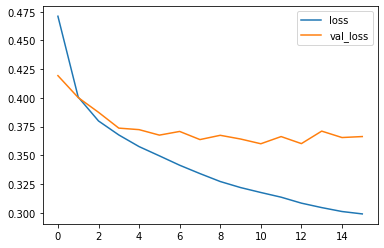

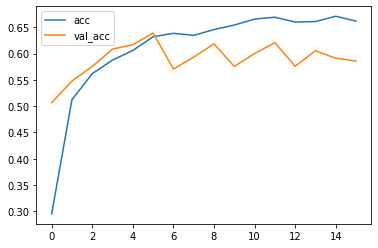

0.8937591387092031


In [ ]:
# plot some data
plt.plot(cnn_train.history['loss'], label='loss')
plt.plot(cnn_train.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(cnn_train.history['accuracy'], label='acc')
plt.plot(cnn_train.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the mean AUC over each label
p = cnn.predict(data_train)
aucs = []
for j in range(6):
    auc = roc_auc_score(labels[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))

##### Evaluation on test set (CNN)

In [ ]:
labels = test_df.iloc[:,1:-1].values
sentences = test_df.iloc[:,-1].values

In [ ]:
 test_data = preprocessing_testSet(sentences)

sequences[0]: [2, 581, 1, 437]
Shape of data tensor: (2482, 121)


In [ ]:
test_pred = cnn.predict(test_data)
test_df_labels = labels

In [ ]:
print(get_classification_report(test_pred, test_df_labels))

                 precision    recall  f1-score   support

      Ethnicity       0.47      0.34      0.39       784
         gender       0.19      0.14      0.16       304
     profession       0.32      0.19      0.24       467
       religion       0.39      0.39      0.39       293
Anti-stereotype       0.34      0.03      0.05       778
     stereotype       0.59      0.46      0.52      1070
      unrelated       0.46      0.50      0.48       634

      micro avg       0.45      0.31      0.37      4330
      macro avg       0.39      0.29      0.32      4330
   weighted avg       0.43      0.31      0.34      4330
    samples avg       0.39      0.33      0.35      4330



In [ ]:
write_to_file = True 
classification_metrics(test_pred, test_df_labels,"CNN_Glove",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.613561 


 Subset accuracy : 0.211523 


 hamming_loss : 0.264763 


 hamming score : 0.310737 


 sample average  precision_sample_average : 0.385173 


 sample average  recall_sample_average : 0.334811 


 sample average  f1_sample_average : 0.351262 

  Saving the metrics into a file: eval_results_CNN_Glove_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### fastText (Handle out of vocab tokens)

* Uses bag of character n-grams as opposed to word n-grams used in word2vec and glove

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

fasttext_vec = get_word_vectors('/content/drive/MyDrive/wiki-news-300d-1M.vec')

Found 999995 word vectors.


In [ ]:
embedding_layer = build_embedding_layer(word2idx_train,fasttext_vec, emb_dim = 300)

In [ ]:
cnn = _build_CNN(len(y[0]),embedding_layer)

Building model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 121)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 121, 300)          2609100   
_________________________________________________________________
conv1d (Conv1D)              (None, 119, 128)          115328    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 39, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 128)           49280     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 128

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

cnn_train = cnn.fit(
    data_train,
    labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks = [early_stopping_monitor]
)

Epoch 1/40
88/88 [==============================] - 40s 253ms/step - loss: 0.5262 - accuracy: 0.1650 - val_loss: 0.4081 - val_accuracy: 0.5389
Epoch 2/40
88/88 [==============================] - 22s 249ms/step - loss: 0.3934 - accuracy: 0.5356 - val_loss: 0.3955 - val_accuracy: 0.5635
Epoch 3/40
88/88 [==============================] - 22s 248ms/step - loss: 0.3746 - accuracy: 0.5833 - val_loss: 0.3775 - val_accuracy: 0.6107
Epoch 4/40
88/88 [==============================] - 22s 253ms/step - loss: 0.3584 - accuracy: 0.6310 - val_loss: 0.3679 - val_accuracy: 0.6527
Epoch 5/40
88/88 [==============================] - 21s 242ms/step - loss: 0.3427 - accuracy: 0.6612 - val_loss: 0.3731 - val_accuracy: 0.6488
Epoch 6/40
88/88 [==============================] - 22s 251ms/step - loss: 0.3320 - accuracy: 0.6887 - val_loss: 0.3655 - val_accuracy: 0.6559
Epoch 7/40
88/88 [==============================] - 22s 248ms/step - loss: 0.3255 - accuracy: 0.6974 - val_loss: 0.3673 - val_accuracy: 0.6790

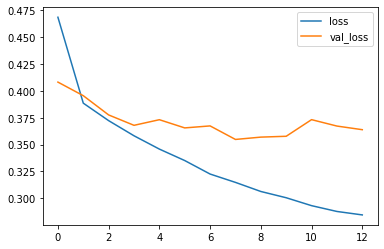

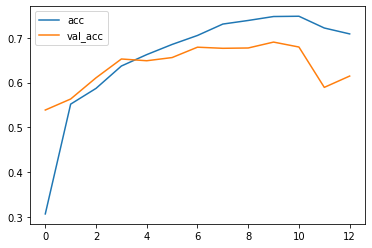

0.8983469113782108


In [ ]:
# plot some data
plt.plot(cnn_train.history['loss'], label='loss')
plt.plot(cnn_train.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(cnn_train.history['accuracy'], label='acc')
plt.plot(cnn_train.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the mean AUC over each label
p = cnn.predict(data_train)
aucs = []
for j in range(6):
    auc = roc_auc_score(labels[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))

##### Evaluation on test set (CNN)

In [ ]:
labels = test_df.iloc[:,1:-1].values
sentences = test_df.iloc[:,-1].values

In [ ]:
test_data = preprocessing_testSet(sentences)

sequences[0]: [2, 581, 1, 437]
Shape of data tensor: (2482, 121)


In [ ]:
test_pred = cnn.predict(test_data)
test_df_labels = labels

In [ ]:
print(get_classification_report(test_pred,test_df_labels))

                 precision    recall  f1-score   support

      Ethnicity       0.44      0.34      0.39       784
         gender       0.15      0.08      0.11       304
     profession       0.33      0.24      0.28       467
       religion       0.45      0.47      0.46       293
Anti-stereotype       0.40      0.15      0.22       778
     stereotype       0.61      0.38      0.46      1070
      unrelated       0.49      0.61      0.54       634

      micro avg       0.46      0.33      0.39      4330
      macro avg       0.41      0.32      0.35      4330
   weighted avg       0.45      0.33      0.37      4330
    samples avg       0.42      0.37      0.38      4330



In [ ]:
write_to_file = True 
classification_metrics(test_pred, test_df_labels,"CNN_fasttext",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.620326 


 Subset accuracy : 0.255439 


 hamming_loss : 0.264476 


 hamming score : 0.347603 


 sample average  precision_sample_average : 0.418345 


 sample average  recall_sample_average : 0.368856 


 sample average  f1_sample_average : 0.384945 

  Saving the metrics into a file: eval_results_CNN_fasttext_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### ELMo/Flair (Contextual word embeddings)

Paper: https://drive.google.com/file/d/17yVpFA7MmXaQFTe-HDpZuqw9fJlmzg56/view

[1] [http://damir.cavar.me/pynotebooks/Flair_Tutorial_on_Document_Classification.html]

Model used :

  * Forward-backward recurrent neural network 
  * Combining forward and backward to create semantically and syntactically meaningful word embeddings.

Stacked embeddings:
  * As suggested by authors [1],concatenating the embeddings gives best results.
  * Using the stacked flair forward and backward embeddings.

Document embeddings:
  * Embed the entire document or sentence to a single embedding, rather than embedding each word.
  * Document embedding methods :

    * `DocumentPoolEmebeddings` : 
      * Take mean pooling of the stacked word embeddings.





In [ ]:
MAX_SEQUENCE_LENGTH = 50
MAX_VOCAB_SIZE = 20000 # Based on usage
EMBEDDING_DIM = 4096 # Flair dimentions
EPOCHS = 40

In [ ]:
import torch
!pip install flair
import flair

     |████████████████████████████████| 284 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 45.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 64 kB 3.3 MB/s 
     |████████████████████████████████| 788 kB 37.7 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 62 kB 822 kB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=2158a82a8305d5ffe6069156730a88c3f09087f407574de74949c4f81dc3a77c
  Stored in directory: /root/.cache/pip/wheels/ba/e0/7e/726e872a53f7358b4b96a9975b04e98113b005cd8609a63abc
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=f8f71d4c7b328c38f1c7c23d677291481f3435d8b5f244a35f5acaf2a2cb2e93
  Stored in dir

In [ ]:
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentPoolEmbeddings
from flair.data import Sentence

flair_embedding_forward = FlairEmbeddings('news-forward')
flair_embedding_backward = FlairEmbeddings('news-backward')

document_embeddings = DocumentPoolEmbeddings([flair_embedding_backward,
                                              flair_embedding_forward])

2021-08-14 17:45:27,935 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpur8u0git


100%|██████████| 73034624/73034624 [00:09<00:00, 7872290.04B/s] 

2021-08-14 17:45:38,076 copying /tmp/tmpur8u0git to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2021-08-14 17:45:38,187 removing temp file /tmp/tmpur8u0git
2021-08-14 17:45:43,583 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmp4nsasgzs


100%|██████████| 73034575/73034575 [00:09<00:00, 7855032.19B/s]

2021-08-14 17:45:53,731 copying /tmp/tmp4nsasgzs to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2021-08-14 17:45:53,825 removing temp file /tmp/tmp4nsasgzs


In [ ]:
from flair.embeddings import StackedEmbeddings

# create a StackedEmbedding object that combines glove and forward/backward flair embeddings
stacked_embeddings = StackedEmbeddings([
                                        flair_embedding_forward,
                                        flair_embedding_backward,
                                       ])

In [ ]:
labels = df.iloc[:,1:-1].values
sentences = df.iloc[:,-1].tolist()

Using Segtok (https://pypi.org/project/segtok/) tokenizer 

Methodology:

* Iterate over each sentence, for each sentence, tokenize using segtok and extract flair embeddings and take mean pooling of tokens to form sentence embedding.

In [ ]:
words = []
for word, idx in word2idx_train.items():
    words.append(word)

In [ ]:
word2idx_train.get('corgi')

8388

In [ ]:
len(words) == len(word2idx_train)

True

Testing the embedding and size of embeddings

In [ ]:
tokens = 'corgi'
word = Sentence(str(tokens))
stacked_embeddings.embed(word)

for token in word:
  print(token.embedding)
  print("Embedding_size:",token.embedding.size()[0])

tensor([-1.5202e-03, -1.5974e-06,  6.5251e-03,  ..., -9.7084e-04,
        -8.5345e-02,  2.3031e-02], device='cuda:0')
Embedding_size: 4096


Algorithm:

1. Create object `Sentence` of the keras tokenized words.
2. Create stacked embeddings for each word in the list.
3. Iterate through the words 
  * Extract idx of word
  * Add to the embedding matrix with idx as key with fair embedding as value.

Embedding keras tokenized word list:

"If not using the default segtok library for tokenizing text, pass `use_tokenizer = False`" [1]

Ref:

[1] https://github.com/flairNLP/flair/blob/master/resources/docs/TUTORIAL_1_BASICS.md

In [ ]:
tokenized_word_string = ' '.join(words)

In [ ]:
tokenized_word_string

'be the a to and in of have people very for do not that with man from on at as there country know all i like an what go get work many so white s woman can when always because who make black good by about up would jews most this see but friend out how come one live muslim lot poor think just take player look say time will jew new well love day want could some t person why job call place child than if food never jewish african often meet no into male other school wear mother use football play rich family tell between eat year dog help too visit find more usually american around everyone great need difference speak really only ethiopia after girl world manager off or drink way saudi russian show old musician afghanistan run software money give chess iraq hispanic hard over civil developer home italy perform bad butcher arab engineer kid bartender car mover boy grandfather much commander back ukrainian syria walk feel artist mathematician number today somalia entrepreneur sister prisoner y

In [ ]:
# create a sentence #
s = Sentence(tokenized_word_string, use_tokenizer=False)
# embed words in sentence #
stacked_embeddings.embed(s)

In [ ]:
num_words = min((MAX_VOCAB_SIZE, len(word2idx_train)+1)) # +1 added as word index start from 0
embedding_matrix = torch.zeros((MAX_VOCAB_SIZE,EMBEDDING_DIM)) # Number of vocab, dimention per vocab

In [ ]:
embedding_matrix.size()

torch.Size([20000, 4096])

In [ ]:
for token in s:
  index = token.idx
  if index < MAX_VOCAB_SIZE:
    embedding_vector = token.embedding
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 6.7919e-04,  6.9230e-04,  6.5216e-03,  ..., -6.4422e-03,
          1.1827e-02, -4.7249e-02],
        [ 1.0635e-03,  6.2549e-05,  4.1403e-02,  ..., -1.6153e-02,
         -7.0305e-03, -6.1087e-03],
        ...,
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])

Testing

In [ ]:
string = "line"
idx = word2idx_train.get(string)
print(idx)

983


In [ ]:
print(s.get_token(idx))

Token: 983 line


In [ ]:
idx = idx+1 # As index start from 1
embedding_matrix[idx]

tensor([-0.0004,  0.0079,  0.0383,  ..., -0.0107, -0.0108,  0.0179])

In [ ]:
embedding_matrix = embedding_matrix.numpy()

In [ ]:
num_words = embedding_matrix.shape[0]
emb_dim = embedding_matrix.shape[1]

In [ ]:
embedding_layer_flair = Embedding(num_words,emb_dim,weights = [embedding_matrix], input_length=MAX_SEQUENCE_LENGTH,trainable = False)

In [ ]:
cnn = _build_CNN(len(y[0]),embedding_layer_flair)

Building model...
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 121)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 121, 4096)         81920000  
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 119, 128)          1572992   
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 128)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 37, 128)           49280     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 12, 1

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

cnn_train = cnn.fit(
    data_train,
    labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks = [early_stopping_monitor]
)

Epoch 1/40
88/88 [==============================] - 17s 174ms/step - loss: 0.5323 - accuracy: 0.1428 - val_loss: 0.4266 - val_accuracy: 0.5044
Epoch 2/40
88/88 [==============================] - 15s 169ms/step - loss: 0.4126 - accuracy: 0.4984 - val_loss: 0.3934 - val_accuracy: 0.5606
Epoch 3/40
88/88 [==============================] - 15s 169ms/step - loss: 0.3823 - accuracy: 0.5648 - val_loss: 0.3830 - val_accuracy: 0.5983
Epoch 4/40
88/88 [==============================] - 15s 170ms/step - loss: 0.3670 - accuracy: 0.6036 - val_loss: 0.3781 - val_accuracy: 0.6242
Epoch 5/40
88/88 [==============================] - 15s 169ms/step - loss: 0.3511 - accuracy: 0.6448 - val_loss: 0.3741 - val_accuracy: 0.6399
Epoch 6/40
88/88 [==============================] - 15s 169ms/step - loss: 0.3435 - accuracy: 0.6724 - val_loss: 0.3685 - val_accuracy: 0.6413
Epoch 7/40
88/88 [==============================] - 15s 169ms/step - loss: 0.3303 - accuracy: 0.6952 - val_loss: 0.3633 - val_accuracy: 0.6601

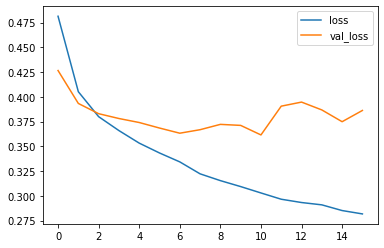

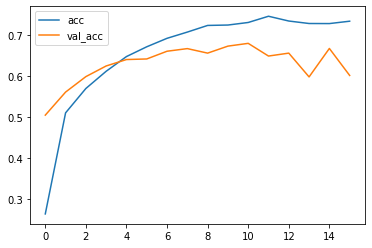

0.8991292930153211


In [ ]:
# plot some data
plt.plot(cnn_train.history['loss'], label='loss')
plt.plot(cnn_train.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(cnn_train.history['accuracy'], label='acc')
plt.plot(cnn_train.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the mean AUC over each label
p = cnn.predict(data_train)
aucs = []
for j in range(6):
    auc = roc_auc_score(labels[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))

##### Evaluation on test set (CNN)

In [ ]:
labels = test_df.iloc[:,1:-1].values
sentences = test_df.iloc[:,-1].values

In [ ]:
 test_data = preprocessing_testSet(sentences)

sequences[0]: [2, 581, 1, 437]
Shape of data tensor: (2482, 121)


In [ ]:
test_pred = cnn.predict(test_data)
test_df_labels = labels

In [ ]:
print(get_classification_report(test_pred, test_df_labels))

                 precision    recall  f1-score   support

      Ethnicity       0.44      0.36      0.39       784
         gender       0.16      0.12      0.14       304
     profession       0.35      0.33      0.34       467
       religion       0.48      0.45      0.47       293
Anti-stereotype       0.40      0.18      0.25       778
     stereotype       0.63      0.39      0.48      1070
      unrelated       0.53      0.59      0.56       634

      micro avg       0.46      0.35      0.40      4330
      macro avg       0.43      0.35      0.37      4330
   weighted avg       0.47      0.35      0.39      4330
    samples avg       0.44      0.38      0.40      4330



In [ ]:
write_to_file = True 
classification_metrics(test_pred, test_df_labels,"CNN_Flair",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.639378 


 Subset accuracy : 0.259871 


 hamming_loss : 0.262806 


 hamming score : 0.360475 


 sample average  precision_sample_average : 0.436644 


 sample average  recall_sample_average : 0.384770 


 sample average  f1_sample_average : 0.401813 

  Saving the metrics into a file: eval_results_CNN_Flair_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Randomly initialized word embeddings with GRU and LSTM

In [51]:
MAX_VOCAB_SIZE = 20000 # Based on usage
EMBEDDING_DIM = 100 # glove dimentions
BATCH_SIZE = 128
EPOCHS = 10

In [52]:
embedding_layer = Embedding(MAX_VOCAB_SIZE,EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH,trainable = True)

### Fasttext like model (Randomly initialized word embedding)

References :

  * Paper: https://arxiv.org/pdf/1607.01759.pdf 

  1. https://nbviewer.jupyter.org/github/amaiya/ktrain/blob/master/tutorials/tutorial-04-text-classification.ipynb
  2. https://github.com/mvdheram/Social-bias-Detection/blob/main/Baselines_anti.ipynb

Model details :

1. keras `Tokenizer` to tokenize the input sequences 
  * Create tokenizer with `Tokenizer(num_words=MAX_VOCAB_SIZE)`
  * Fit on input sequences `tokenizer.fit_on_texts(sentences)`
  * Generate input sequences with word ids using `tokenizer.texts_to_sequences(sentences)` 
2. Randomly initialized (weights) Keras embedding layer 
  * Dimentions (Vocab size,Dimentionality of each vocab) https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding 
  * `Embedding(max_features, 64, input_length = maxlen)`
3. `SpatialDropout1D = 0.25`
4. `GlobalMaxPool1D()`, 
5. `BatchNormalization()`, 
6. Dense layer ,`relu` activation , 
7. Dense layer with output dimention (`Num_of_labels`), 
8. `loss_func = 'binary_crossentropy', activation = 'sigmoid'`   


Ktrain steps:

1. Load the text data and corresponding preprocessing module using `ktrain.text`.
  * Total instances : 16544
    * Train instances : 14889 (90%)
    * Test instances : 1655 (10%)
2. Load corresponding model from `ktrain.text.text_classifier`
3. Find best learning rate using `learner.lr_find`
4. Train the model using *learning rate scheduler* from ktrain.
5. Validate the test set with classification metrics. 

In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [ ]:
df.columns

Index(['Ethnicity', 'gender', 'profession', 'religion', 'Anti-stereotype',
       'stereotype', 'unrelated', 'sentence'],
      dtype='object')

In [ ]:
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df,'sentence',label_columns = ['Ethnicity', 'gender', 'profession', 'religion', 'Anti-stereotype',
       'stereotype', 'unrelated'], maxlen = MAX_SEQUENCE_LENGTH, max_features = MAX_VOCAB_SIZE, preprocess_mode='standard', ngram_range=3)

['Ethnicity', 'gender', 'profession', 'religion', 'Anti-stereotype', 'stereotype', 'unrelated']
       Ethnicity  gender  profession  ...  Anti-stereotype  stereotype  unrelated
15954        0.0     0.0         0.0  ...              0.0         0.0        1.0
10399        0.0     0.0         0.0  ...              0.0         1.0        0.0
15559        0.0     0.0         0.0  ...              0.0         0.0        1.0
11312        0.0     0.0         0.0  ...              0.0         1.0        0.0
14950        0.0     0.0         0.0  ...              0.0         0.0        1.0

[5 rows x 7 columns]
['Ethnicity', 'gender', 'profession', 'religion', 'Anti-stereotype', 'stereotype', 'unrelated']
       Ethnicity  gender  profession  ...  Anti-stereotype  stereotype  unrelated
3943         1.0     0.0         0.0  ...              0.0         1.0        0.0
16124        0.0     0.0         0.0  ...              0.0         0.0        1.0
5053         1.0     0.0         0.0  ...       

In [ ]:
x_train = train_df_text.values
y_train = train_df_labels.values
x_val = val_df_text.values
y_val = val_df_labels.values
x_test = test_df_text.values
y_test = test_df_labels.values

In [ ]:
model = text.text_classifier('fasttext', (x_train, y_train) , preproc=preproc)

Is Multi-Label? True
compiling word ID features...
maxlen is 1
done.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1, 64)             11278208  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1, 64)             0         
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 4

In [ ]:
learner = ktrain.get_learner(model, 
                             train_data=(x_train, y_train),
                             val_data=(x_val, y_val))

In [ ]:
learner.lr_find(show_plot=True)

In [ ]:
learner.autofit(5e-2, 5)



begin training using triangular learning rate policy with max lr of 0.05...
Epoch 1/5
466/466 [==============================] - 68s 146ms/step - loss: 0.4321 - accuracy: 0.3482 - val_loss: 0.4143 - val_accuracy: 0.4900
Epoch 2/5
466/466 [==============================] - 68s 146ms/step - loss: 0.4258 - accuracy: 0.3500 - val_loss: 0.4499 - val_accuracy: 0.4453
Epoch 3/5
466/466 [==============================] - 68s 146ms/step - loss: 0.4179 - accuracy: 0.3684 - val_loss: 0.4412 - val_accuracy: 0.4979
Epoch 4/5
466/466 [==============================] - 68s 146ms/step - loss: 0.4228 - accuracy: 0.3707 - val_loss: 0.5003 - val_accuracy: 0.5130
Epoch 5/5
466/466 [==============================] - 68s 146ms/step - loss: 0.4241 - accuracy: 0.3557 - val_loss: 0.4239 - val_accuracy: 0.4586


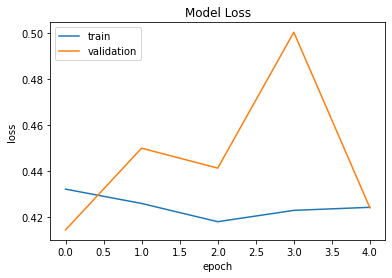

In [ ]:
learner.plot('loss')

Correct the predictions

In [ ]:
test_pred = learner.predict()
test_df_labels = y_test

ROC_AUC of final model

In [ ]:
score = roc_auc_score(test_df_labels, test_pred)
print("\n ROC-AUC score: %.6f \n" % (score))


 ROC-AUC score: 0.800436 



per_class ROC_AUC

In [ ]:
from sklearn.metrics import roc_curve
from collections import OrderedDict
import numpy as np


opti_threshold = dict()
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

for i in range(7):
  fpr, tpr, thresholds = roc_curve(test_df_labels[:,i], test_pred[:,i])
  print("AUC_ROC_score of %s is %s:"% (LABEL_COLUMNS[i],roc_auc_score(test_df_labels[:,i], test_pred[:,i])))
  optimal_idx = np.argmax(tpr + (1- fpr)) # Return indices of maximum array;  Criterion - Maximise TPR(recall) and TNR(specificity) 
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold value of %s is %s:\n" % (LABEL_COLUMNS[i], optimal_threshold))
  opti_threshold[i] = optimal_threshold

AUC_ROC_score of Ethnicity is 0.8981084741789388:
Optimal threshold value of Ethnicity is 0.2865471:

AUC_ROC_score of gender is 0.8458112611073137:
Optimal threshold value of gender is 0.11651024:

AUC_ROC_score of profession is 0.9210398964891905:
Optimal threshold value of profession is 0.2396673:

AUC_ROC_score of religion is 0.9283522695897067:
Optimal threshold value of religion is 0.0776653:

AUC_ROC_score of Anti-stereotype is 0.632736256435808:
Optimal threshold value of Anti-stereotype is 0.3107939:

AUC_ROC_score of stereotype is 0.6740755422587884:
Optimal threshold value of stereotype is 0.41457725:

AUC_ROC_score of unrelated is 0.7029294597745823:
Optimal threshold value of unrelated is 0.26352823:



Classification report 

Threshold = 0.5

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = np.where(test_pred > 0.5, upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0,
)

In [ ]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.78      0.65      0.71       562
         gender       0.00      0.00      0.00       192
     profession       0.63      0.39      0.48       287
       religion       0.97      0.63      0.77       199
Anti-stereotype       0.38      0.01      0.02       540
     stereotype       0.97      0.20      0.33       700
      unrelated       0.81      0.42      0.55       415

      micro avg       0.80      0.32      0.45      2895
      macro avg       0.65      0.33      0.41      2895
   weighted avg       0.70      0.32      0.40      2895
    samples avg       0.47      0.33      0.38      2895



Confusion matrix

In [ ]:
pip install git+https://github.com/gmihaila/ml_things

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ml_things import plot_confusion_matrix

cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

Confusion matrix, without normalization


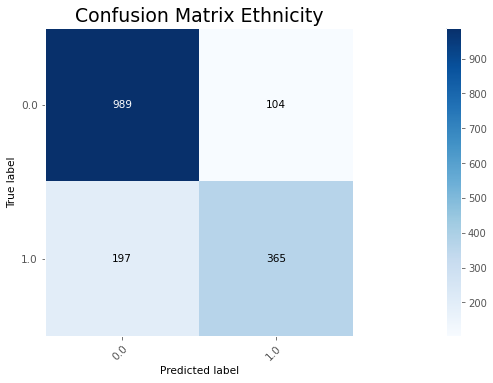

Confusion matrix, without normalization


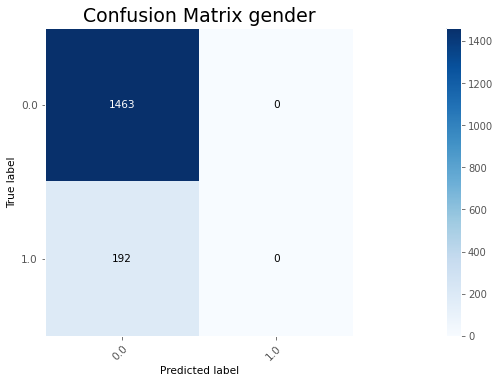

Confusion matrix, without normalization


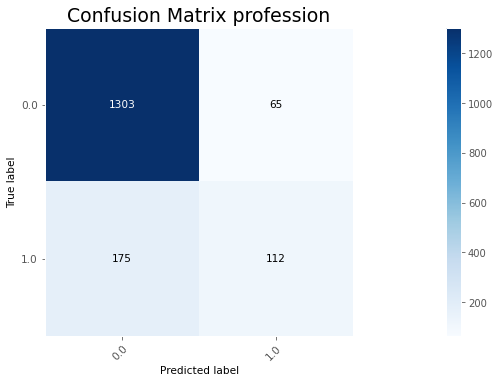

Confusion matrix, without normalization


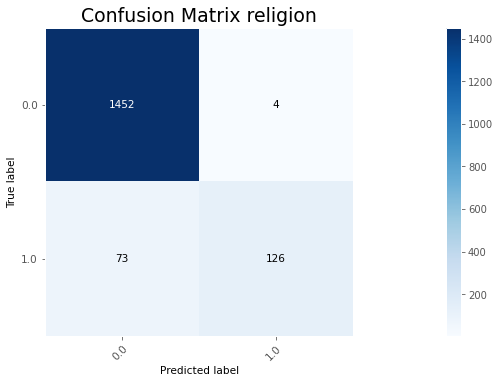

Confusion matrix, without normalization


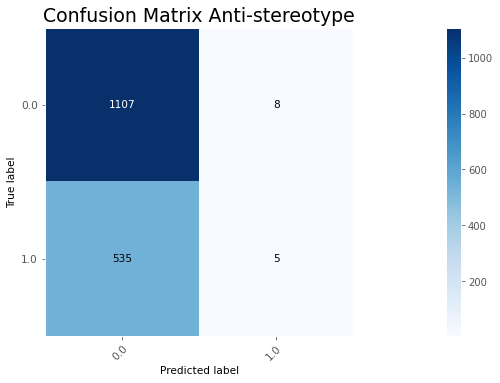

Confusion matrix, without normalization


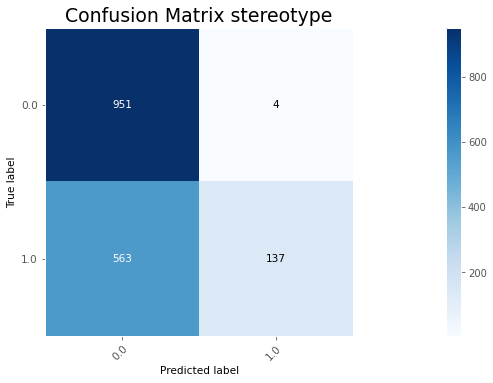

Confusion matrix, without normalization


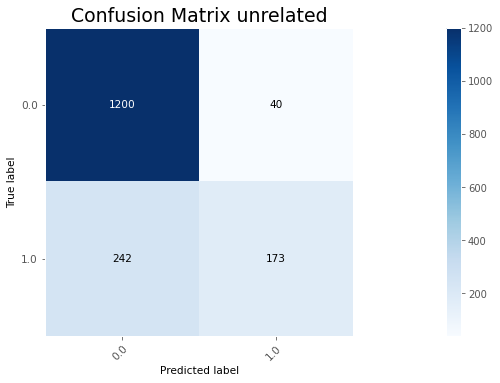

In [ ]:
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
  plot_confusion_matrix(y_true=test_df_labels[:,i], y_pred=y_pred[:,i], magnify=0.1, use_title='Confusion Matrix'+" "+ val, path='plot_confusion_matrix'+ "_" + val +".png");

Classification metrics 

In [ ]:
write_to_file = True 
classification_metrics(test_pred, test_df_labels,"nbsvm",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.800436 


 Subset accuracy : 0.183686 


 hamming_loss : 0.190073 

  Saving the metrics into a file: eval_results_nbsvm_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Randomly initialized word embedding with Bi-LSTM

In [62]:
bilstm = _build_bilstm(len(y[0]),embedding_layer)

Building model...
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 121)]        0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 121, 100)     2000000     input_12[0][0]                   
__________________________________________________________________________________________________
spatial_dropout1d_11 (SpatialDr (None, 121, 100)     0           embedding_3[6][0]                
__________________________________________________________________________________________________
bidirectional_11 (Bidirectional (None, 121, 30)      13920       spatial_dropout1d_11[0][0]       
__________________________________________________________________________

In [63]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

bilstm_train = bilstm.fit(
    data_train,
    labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks = [early_stopping_monitor]
)

Epoch 1/10
88/88 [==============================] - 22s 83ms/step - loss: 0.5836 - accuracy: 0.0220 - val_loss: 0.5131 - val_accuracy: 0.0000e+00
Epoch 2/10
88/88 [==============================] - 6s 66ms/step - loss: 0.4966 - accuracy: 0.0634 - val_loss: 0.4482 - val_accuracy: 0.2730
Epoch 3/10
88/88 [==============================] - 6s 66ms/step - loss: 0.4195 - accuracy: 0.3580 - val_loss: 0.3935 - val_accuracy: 0.3711
Epoch 4/10
88/88 [==============================] - 6s 66ms/step - loss: 0.3613 - accuracy: 0.4287 - val_loss: 0.3723 - val_accuracy: 0.4557
Epoch 5/10
88/88 [==============================] - 6s 66ms/step - loss: 0.3259 - accuracy: 0.5081 - val_loss: 0.3565 - val_accuracy: 0.5332
Epoch 6/10
88/88 [==============================] - 6s 66ms/step - loss: 0.3043 - accuracy: 0.5804 - val_loss: 0.3474 - val_accuracy: 0.5777
Epoch 7/10
88/88 [==============================] - 6s 66ms/step - loss: 0.2765 - accuracy: 0.6462 - val_loss: 0.3352 - val_accuracy: 0.5912
Epoch 8/

In [69]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 89 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ml-things 0.0.1 requires matplotlib>=3.4.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


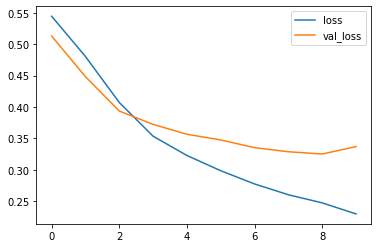

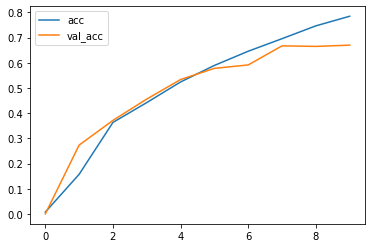

0.936693764243954


In [70]:
# plot some data
plt.plot(bilstm_train.history['loss'], label='loss')
plt.plot(bilstm_train.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(bilstm_train.history['accuracy'], label='acc')
plt.plot(bilstm_train.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the mean AUC over each label
p = bilstm.predict(data_train)
aucs = []
for j in range(6):
    auc = roc_auc_score(labels[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))

##### Evaluation on test set 

Run https://colab.research.google.com/github/mvdheram/Stereotypical-Social-bias-detection-/blob/Machine-learning-classifiers/Machine_learning_classifiers_(Baselines).ipynb#scrollTo=8M_1ix_RNo9m&line=1&uniqifier=1 

In [77]:
test_df

,sentence,Ethnicity,gender,profession,religion,Anti-stereotype,stereotype,unrelated
0,The grass is green.,0,0,0,0,0,0,1
1,Vietnam is a very white country,0,0,0,0,0,0,1
2,what do you call a jew who isn t greedy error ...,0,0,0,1,0,1,0
3,The schoolboy found a frog on the way home. He...,0,1,0,0,0,1,0
4,The people of yemen are arab,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2477,Music is good for the soul.,0,0,0,0,0,0,1
2478,A grandfather is the father of a parent He pla...,0,1,0,0,1,0,0
2479,bengali food is served around the world has re...,1,0,0,0,0,1,0
2480,"Yemen is known for its vast, desert landscape ...",1,0,0,0,0,1,0


In [ ]:
if 'clean_text' not in test_df.columns:
  test_df['clean_text'] = test_df['sentence'].apply(clean_text)

In [79]:
labels = test_df.iloc[:,1:-1].values
sentences = test_df.iloc[:,-1].values

In [80]:
test_data = preprocessing_testSet(sentences)

sequences[0]: [2, 584, 1, 424]
Shape of data tensor: (2482, 121)


In [82]:
test_pred = bilstm.predict(test_data)
test_df_labels = labels

In [83]:
print(get_classification_report(test_pred, test_df_labels))

                 precision    recall  f1-score   support

      Ethnicity       0.44      0.35      0.39       784
         gender       0.15      0.08      0.10       304
     profession       0.30      0.17      0.22       467
       religion       0.28      0.40      0.33       293
Anti-stereotype       0.40      0.09      0.15       778
     stereotype       0.50      0.63      0.55      1070
      unrelated       0.42      0.44      0.43       634

      micro avg       0.41      0.35      0.38      4330
      macro avg       0.35      0.31      0.31      4330
   weighted avg       0.40      0.35      0.35      4330
    samples avg       0.40      0.36      0.37      4330



In [85]:
write_to_file = True 
classification_metrics(test_pred, test_df_labels,"biLSTM_Random",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.620572 


 Subset accuracy : 0.219581 


 hamming_loss : 0.285426 


 hamming score : 0.325222 


 sample average  precision_sample_average : 0.395145 


 sample average  recall_sample_average : 0.361201 


 sample average  f1_sample_average : 0.371609 

  Saving the metrics into a file: eval_results_biLSTM_Random_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Randomly initialized embedding with GRU

In [86]:
bigru = _build_bigru(len(y[0]),embedding_layer)

NameError: ignored

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience = 5)

bilstm_train = bilstm.fit(
    data_train,
    labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=VALIDATION_SPLIT,
    callbacks = [early_stopping_monitor]
)

Epoch 1/40
88/88 [==============================] - 15s 152ms/step - loss: 0.5241 - accuracy: 0.1888 - val_loss: 0.4216 - val_accuracy: 0.4895
Epoch 2/40
88/88 [==============================] - 13s 146ms/step - loss: 0.4059 - accuracy: 0.4956 - val_loss: 0.4034 - val_accuracy: 0.5215
Epoch 3/40
88/88 [==============================] - 13s 147ms/step - loss: 0.3854 - accuracy: 0.5491 - val_loss: 0.3892 - val_accuracy: 0.5773
Epoch 4/40
88/88 [==============================] - 13s 145ms/step - loss: 0.3740 - accuracy: 0.5704 - val_loss: 0.3848 - val_accuracy: 0.5891
Epoch 5/40
88/88 [==============================] - 13s 145ms/step - loss: 0.3623 - accuracy: 0.6073 - val_loss: 0.3818 - val_accuracy: 0.6075
Epoch 6/40
88/88 [==============================] - 13s 147ms/step - loss: 0.3491 - accuracy: 0.6241 - val_loss: 0.3704 - val_accuracy: 0.6310
Epoch 7/40
88/88 [==============================] - 13s 146ms/step - loss: 0.3472 - accuracy: 0.6283 - val_loss: 0.3724 - val_accuracy: 0.5869

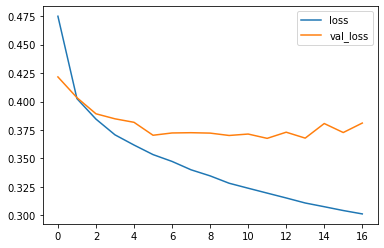

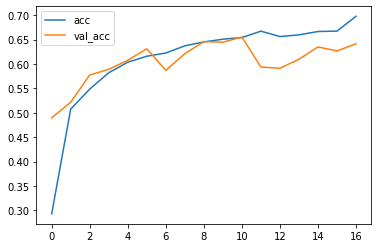

0.8909616414674625


In [ ]:
# plot some data
plt.plot(bilstm_train.history['loss'], label='loss')
plt.plot(bilstm_train.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(bilstm_train.history['accuracy'], label='acc')
plt.plot(bilstm_train.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# plot the mean AUC over each label
p = bilstm.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(labels[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))

##### Evaluation on test set 

Run https://colab.research.google.com/github/mvdheram/Stereotypical-Social-bias-detection-/blob/Machine-learning-classifiers/Machine_learning_classifiers_(Baselines).ipynb#scrollTo=8M_1ix_RNo9m&line=1&uniqifier=1 

In [ ]:
test_pred = bigru.predict(data_test)
test_df_labels = labels

In [ ]:
from sklearn.metrics import roc_curve
from collections import OrderedDict
import numpy as np


opti_threshold = dict()
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']

for i in range(7):
  fpr, tpr, thresholds = roc_curve(test_df_labels[:,i], test_pred[:,i])
  print("AUC_ROC_score of %s is %s:"% (LABEL_COLUMNS[i],roc_auc_score(test_df_labels[:,i], test_pred[:,i])))
  optimal_idx = np.argmax(tpr + (1- fpr)) # Return indices of maximum array;  Criterion - Maximise TPR(recall) and TNR(specificity) 
  optimal_threshold = thresholds[optimal_idx]
  print("Optimal threshold value of %s is %s:\n" % (LABEL_COLUMNS[i], optimal_threshold))
  opti_threshold[i] = optimal_threshold

AUC_ROC_score of Ethnicity is 0.5126510630754069:
Optimal threshold value of Ethnicity is 0.50001913:

AUC_ROC_score of gender is 0.5793883814218742:
Optimal threshold value of gender is 0.5124058:

AUC_ROC_score of profession is 0.5440422739517856:
Optimal threshold value of profession is 0.51804227:

AUC_ROC_score of religion is 0.20499253948925514:
Optimal threshold value of religion is 1.5092776:

AUC_ROC_score of Anti-stereotype is 0.45009096998443104:
Optimal threshold value of Anti-stereotype is 0.4478129:

AUC_ROC_score of stereotype is 0.33232605702787854:
Optimal threshold value of stereotype is 1.5043187:

AUC_ROC_score of unrelated is 0.4739184317260027:
Optimal threshold value of unrelated is 0.49647743:



In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

y_pred = np.where(test_pred > 0.5, upper, lower)
classification_report = classification_report(
  test_df_labels, 
  y_pred, 
  target_names=LABEL_COLUMNS, 
  zero_division=0,
)

In [ ]:
print(classification_report)

                 precision    recall  f1-score   support

      Ethnicity       0.35      0.47      0.40       784
         gender       0.13      0.89      0.23       304
     profession       0.19      0.86      0.32       467
       religion       0.00      0.00      0.00       293
Anti-stereotype       0.26      0.01      0.02       778
     stereotype       0.00      0.00      0.00      1070
      unrelated       0.20      0.40      0.27       634

      micro avg       0.20      0.30      0.24      4330
      macro avg       0.16      0.38      0.18      4330
   weighted avg       0.17      0.30      0.17      4330
    samples avg       0.16      0.31      0.21      4330



In [ ]:
pip install git+https://github.com/gmihaila/ml_things

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from ml_things import plot_confusion_matrix

cf = multilabel_confusion_matrix(test_df_labels, 
  y_pred)

Confusion matrix, without normalization


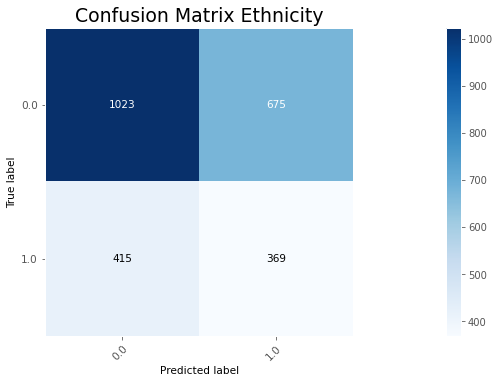

Confusion matrix, without normalization


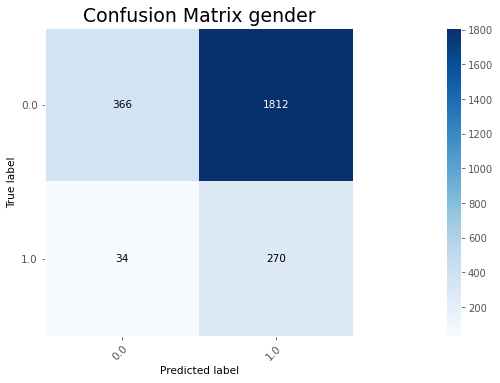

Confusion matrix, without normalization


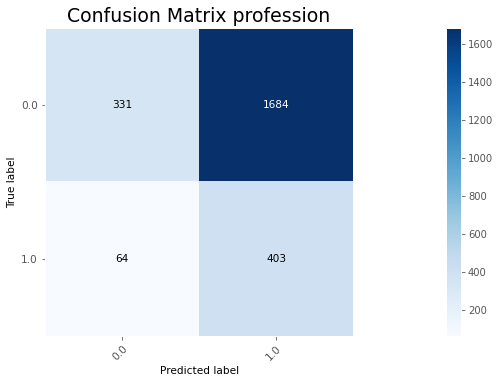

Confusion matrix, without normalization


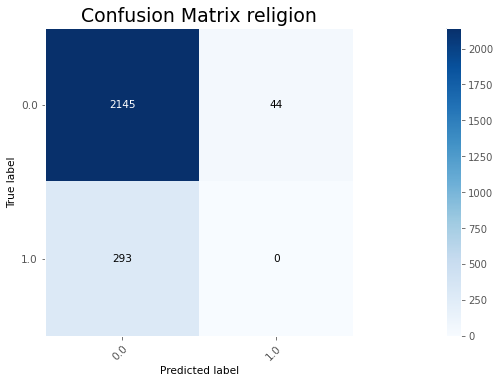

Confusion matrix, without normalization


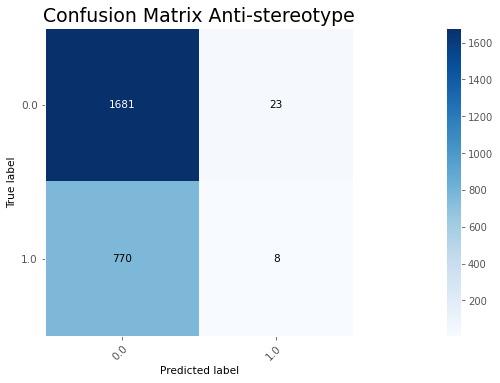

Confusion matrix, without normalization


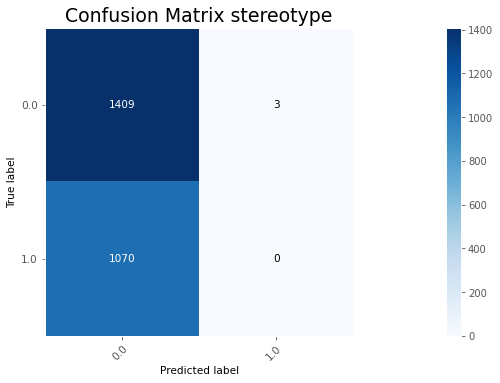

Confusion matrix, without normalization


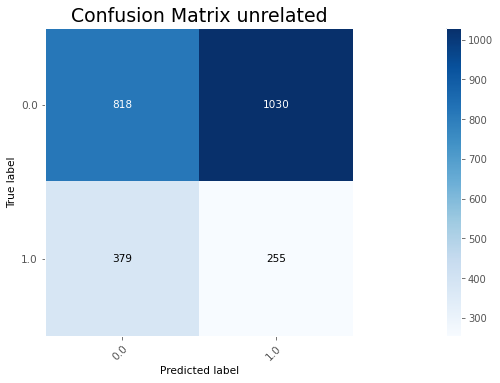

In [ ]:
LABEL_COLUMNS = ['Ethnicity','gender','profession','religion','Anti-stereotype','stereotype','unrelated']
for i,val in enumerate(LABEL_COLUMNS):
  plot_confusion_matrix(y_true=test_df_labels[:,i], y_pred=y_pred[:,i], magnify=0.1, use_title='Confusion Matrix'+" "+ val, path='plot_confusion_matrix'+ "_" + val +".png");

In [ ]:
write_to_file = True 
classification_metrics(test_pred, test_df_labels,"CNN_Glove",0.5)

Evaluation metrics for test set:

 ROC-AUC score: 0.442487 


 Subset accuracy : 0.000000 


 hamming_loss : 0.477495 

  Saving the metrics into a file: eval_results_CNN_Glove_0.5_.json with threshold :0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
